In [18]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Global Configurations
INPUT_SIZE = 21
OUTPUT_SIZE = 2
BATCH_SIZE = 64
LEARNING_RATE = 0.001
EPOCHS = 100
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [19]:
def load_and_preprocess_data(filepath):
    # Load dataset
    df = pd.read_csv(filepath)

    # Feature-Target Separation
    X = df.drop('Diabetes_binary', axis=1)
    y = df['Diabetes_binary']

    # Train-Test Split (80/20 Ratio)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Feature Scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Persistence: Save scaler for deployment
    joblib.dump(scaler, 'diabetes_scaler.joblib')

    # Convert to PyTorch Tensors
    return (torch.FloatTensor(X_train_scaled).to(DEVICE),
            torch.FloatTensor(X_test_scaled).to(DEVICE),
            torch.LongTensor(y_train.values).to(DEVICE),
            torch.LongTensor(y_test.values).to(DEVICE))

X_train, X_test, y_train, y_test = load_and_preprocess_data('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

Training Shuru Ho Rahi Hai...
Epoch [10/100], Loss: 0.4754
Epoch [20/100], Loss: 0.4691
Epoch [30/100], Loss: 0.4677
Epoch [40/100], Loss: 0.4675
Epoch [50/100], Loss: 0.4673
Epoch [60/100], Loss: 0.4670
Epoch [70/100], Loss: 0.4667
Epoch [80/100], Loss: 0.4664
Epoch [90/100], Loss: 0.4661
Epoch [100/100], Loss: 0.4658


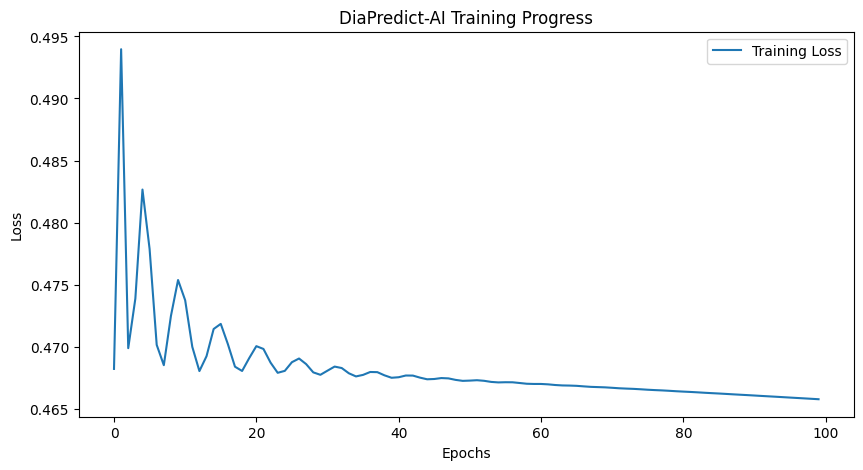

Mubarak ho! Aapka model 'dia_predict_model.pth' naam se save ho gaya hai.


In [20]:
# 1. Training Parameters set karna
criterion = nn.CrossEntropyLoss() # Loss check karne ke liye
optimizer = optim.Adam(model.parameters(), lr=0.001) # Learning process ke liye
epochs = 100 # Kitni baar data dekhna hai
losses = []

print("Training Shuru Ho Rahi Hai...")

# 2. Training Loop
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# 3. Loss Graph dikhana (Jaise Kedar ki file mein tha)
plt.figure(figsize=(10,5))
plt.plot(losses, label='Training Loss')
plt.title('DiaPredict-AI Training Progress')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 4. Model Save karna
torch.save(model.state_dict(), 'dia_predict_model.pth')
print("Mubarak ho! Aapka model 'dia_predict_model.pth' naam se save ho gaya hai.")

Epoch 10/100 | Loss: 0.4654
Epoch 20/100 | Loss: 0.4651
Epoch 30/100 | Loss: 0.4647
Epoch 40/100 | Loss: 0.4643
Epoch 50/100 | Loss: 0.4639
Epoch 60/100 | Loss: 0.4635
Epoch 70/100 | Loss: 0.4630
Epoch 80/100 | Loss: 0.4626
Epoch 90/100 | Loss: 0.4621
Epoch 100/100 | Loss: 0.4616


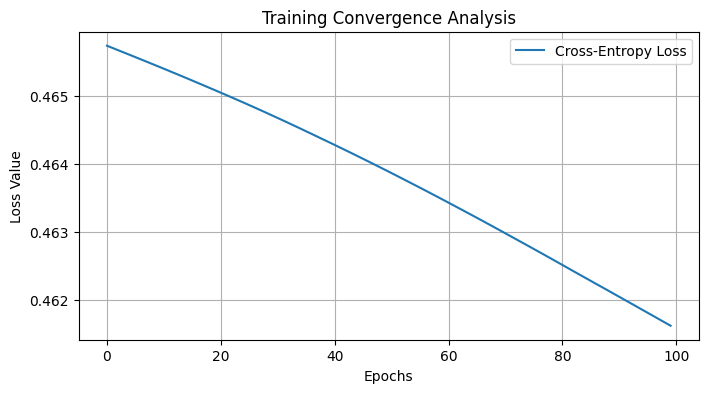

In [21]:
def train_model(model, X_train, y_train, epochs):
    loss_history = []
    model.train()

    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        loss_history.append(loss.item())
        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch+1}/{epochs} | Loss: {loss.item():.4f}")

    return loss_history

history = train_model(model, X_train, y_train, EPOCHS)

# Visualization of Training Convergence
plt.figure(figsize=(8, 4))
plt.plot(history, label='Cross-Entropy Loss')
plt.title('Training Convergence Analysis')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
def evaluate_performance(model, X_test, y_test):
    model.eval()
    with torch.no_grad():
        logits = model(X_test)
        probabilities = torch.softmax(logits, dim=1)
        predictions = torch.argmax(probabilities, dim=1)

        accuracy = (predictions == y_test).float().mean()
        print(f"Final Model Accuracy: {accuracy.item()*100:.2f}%\n")
        print("Classification Summary:")
        print(classification_report(y_test.cpu(), predictions.cpu()))

evaluate_performance(model, X_test, y_test)

# Model Persistence
torch.save(model.state_dict(), 'dia_predict_model.pth')

Final Model Accuracy: 74.21%

Classification Summary:
              precision    recall  f1-score   support

           0       0.77      0.70      0.73      7090
           1       0.72      0.78      0.75      7049

    accuracy                           0.74     14139
   macro avg       0.74      0.74      0.74     14139
weighted avg       0.74      0.74      0.74     14139

